### ● Read the Data

In [1]:
## Starter code

import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

movielens = pd.read_csv("https://www3.nd.edu/~jng2/movielens.csv", encoding='latin-1')
movielens.head()

# The following statements should get the three data files loaded as DataFrames. 

airlines = pd.read_csv("../resource/asnlib/publicdata/airlines.csv")
airports = pd.read_csv("../resource/asnlib/publicdata/airports.csv")
flights  = pd.read_csv("https://www3.nd.edu/~jng2/flights_20_perc.csv") 
# the flights file is ~140mb so will take a few seconds to load

In [2]:
# Explore the data
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


### ● Explore the Data

In [3]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [4]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,10,14,3,UA,356,N494UA,11618,13930,1945,...,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,27,2,MQ,3458,N671MQ,ORD,MLI,820,...,1100.0,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0
2,2015,7,6,1,B6,1202,N535JB,FLL,JFK,1507,...,1809.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,6,13,6,DL,2529,N301DQ,ATL,CLE,2204,...,2343.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,6,6,6,WN,2560,N7729A,CLT,BWI,1325,...,1459.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#check the full column name
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

### ● Question1 : Do flight delays happen more often later in the day compared to earlier in the day?

#### 1. Extract and Explore columns relate to Time and Delay


In [6]:
flights[['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1945,1948.0,3.0,2124,2104.0,-20.0
1,820,933.0,73.0,913,1100.0,107.0
2,1507,1522.0,15.0,1813,1809.0,-4.0
3,2204,2204.0,0.0,2352,2343.0,-9.0
4,1325,1335.0,10.0,1500,1459.0,-1.0
5,1950,2022.0,32.0,2300,2320.0,20.0
6,1130,1145.0,15.0,1720,1735.0,15.0
7,1412,1402.0,-10.0,1557,1613.0,16.0
8,900,857.0,-3.0,1125,1140.0,15.0
9,905,859.0,-6.0,1004,946.0,-18.0


> Findings: if the number of delay is POSITIVE, the flight is delayed

#### 2. Null Values
2-1. Check Null values in these columns

In [7]:
print('Whether there are null values in these columns:')
for i in list(['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY']):
    print(i,':',flights[i].isnull().any())

Whether there are null values in these columns:
SCHEDULED_DEPARTURE : False
DEPARTURE_TIME : True
DEPARTURE_DELAY : True
SCHEDULED_ARRIVAL : False
ARRIVAL_TIME : True
ARRIVAL_DELAY : True


> Findings: DEPARTURE_TIME, DEPARTURE_DELAY, ARRIVAL_TIME, ARRIVAL_DELAY have Null Values

2-2. Find the reasons behing NA

● Think:
 - think whether we can fill the NAs or remove it <br>
 - confirm whether they the NAs we don't know how to deal with will affect our analysis

In [8]:
mask = ((flights['DEPARTURE_TIME'].isnull()) | (flights['DEPARTURE_DELAY'].isnull()) | (flights['ARRIVAL_TIME'].isnull()) | (flights['ARRIVAL_DELAY'].isnull()))
flights[mask]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
22,2015,3,5,4,MQ,2962,N642MQ,CLL,DFW,600,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
161,2015,6,1,1,EV,5898,N13566,CMH,EWR,1708,...,NaN,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN
172,2015,6,30,2,WN,492,N631SW,OAK,LAX,710,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
273,2015,1,18,7,OO,5654,N237SW,SFO,MRY,1331,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
300,2015,1,3,6,OO,7376,N460SW,BTM,SLC,620,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
331,2015,3,3,2,WN,1621,N732SW,MDW,SDF,1035,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
374,2015,4,9,4,EV,5941,N13969,ORD,AVP,1355,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
542,2015,12,12,6,AA,2433,N871AA,SFO,DFW,643,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
576,2015,3,5,4,DL,2404,N3730B,SAN,JFK,630,...,2323.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
606,2015,5,18,1,DL,1443,N985AT,IAH,ATL,1112,...,1622.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN


> Findings: the NAs of departure time|departure delay|arrival time|arrival delay normally happened when the flight was diverted or cancelled. We can take out these NAs because they won't affect our analysis of the flights' delays. It is ok for us to focus the flight that not diverted and cancelled.

2-3. Deal with NAs: <br> 
Remove the NAs caused by diverted or cancelled flight and see whether there is still NAs in the columns we selected.

In [9]:
for i in list(['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY']):
    print(i,':',flights[(flights['DIVERTED']==0) & (flights['CANCELLED']==0)][i].isnull().any())

SCHEDULED_DEPARTURE : False
DEPARTURE_TIME : False
DEPARTURE_DELAY : False
SCHEDULED_ARRIVAL : False
ARRIVAL_TIME : False
ARRIVAL_DELAY : False


> Findings: After selecting the flights not diverted and not cancelled, we don't get any NAs in columns of 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY'!

#### 3. Prepare the data for analysis

3-1. Get only the HOUR of departure and arrival time, in order to groupby HOUR and then count the delayed number

In [10]:
print(flights['SCHEDULED_DEPARTURE'].dtype)

int64


> Findings: 
Since the departure time is in int format, to extract the HOUR part, I decide to divide it by 100 and then use the round method

In [11]:
flights['SCHEDULED_DEPARTURE_HOUR'] = np.array((flights['SCHEDULED_DEPARTURE']/100)).astype(int)
flights['SCHEDULED_ARRIVAL_HOUR'] = np.array((flights['SCHEDULED_ARRIVAL']/100)).astype(int)
q1_delay_dfset = flights[(flights['DIVERTED']==0) & (flights['CANCELLED']==0)][['YEAR','MONTH','ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE','SCHEDULED_DEPARTURE','SCHEDULED_DEPARTURE_HOUR','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','SCHEDULED_ARRIVAL_HOUR','ARRIVAL_DELAY']]
q1_delay_dfset 

,YEAR,MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_DEPARTURE_HOUR,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY
0,2015,10,11618,13930,UA,1945,19,3.0,2124,21,-20.0
1,2015,1,ORD,MLI,MQ,820,8,73.0,913,9,107.0
2,2015,7,FLL,JFK,B6,1507,15,15.0,1813,18,-4.0
3,2015,6,ATL,CLE,DL,2204,22,0.0,2352,23,-9.0
4,2015,6,CLT,BWI,WN,1325,13,10.0,1500,15,-1.0
5,2015,3,MDW,BOS,WN,1950,19,32.0,2300,23,20.0
6,2015,7,DEN,FLL,WN,1130,11,15.0,1720,17,15.0
7,2015,4,MYR,LGA,NK,1412,14,-10.0,1557,15,16.0
8,2015,9,SJC,HNL,AS,900,9,-3.0,1125,11,15.0
9,2015,11,ORD,PIA,EV,905,9,-6.0,1004,10,-18.0


3-2. Create columns to illustrate whether the flights is delayed or not. <br>
Here, I create two new columns. One for departure, the other is for arrival. I don't merge the situation of departure_delay and the situation of arrival_delay because these two segments may have different insights.

In [12]:
q1_delay_dfset.drop(['SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL'],axis=1,inplace=True)
q1_delay_dfset

,YEAR,MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINE,SCHEDULED_DEPARTURE_HOUR,DEPARTURE_DELAY,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY
0,2015,10,11618,13930,UA,19,3.0,21,-20.0
1,2015,1,ORD,MLI,MQ,8,73.0,9,107.0
2,2015,7,FLL,JFK,B6,15,15.0,18,-4.0
3,2015,6,ATL,CLE,DL,22,0.0,23,-9.0
4,2015,6,CLT,BWI,WN,13,10.0,15,-1.0
5,2015,3,MDW,BOS,WN,19,32.0,23,20.0
6,2015,7,DEN,FLL,WN,11,15.0,17,15.0
7,2015,4,MYR,LGA,NK,14,-10.0,15,16.0
8,2015,9,SJC,HNL,AS,9,-3.0,11,15.0
9,2015,11,ORD,PIA,EV,9,-6.0,10,-18.0


In [13]:
q1_delay_dfset['DEPARTURE_DELAY_BOOL'] = np.where(q1_delay_dfset ['DEPARTURE_DELAY']<=0, 0, 1)
q1_delay_dfset['ARRIVAL_DELAY_BOOL'] = np.where(q1_delay_dfset ['ARRIVAL_DELAY']<=0, 0, 1)
q1_delay_dfset 

,YEAR,MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINE,SCHEDULED_DEPARTURE_HOUR,DEPARTURE_DELAY,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY,DEPARTURE_DELAY_BOOL,ARRIVAL_DELAY_BOOL
0,2015,10,11618,13930,UA,19,3.0,21,-20.0,1,0
1,2015,1,ORD,MLI,MQ,8,73.0,9,107.0,1,1
2,2015,7,FLL,JFK,B6,15,15.0,18,-4.0,1,0
3,2015,6,ATL,CLE,DL,22,0.0,23,-9.0,0,0
4,2015,6,CLT,BWI,WN,13,10.0,15,-1.0,1,0
5,2015,3,MDW,BOS,WN,19,32.0,23,20.0,1,1
6,2015,7,DEN,FLL,WN,11,15.0,17,15.0,1,1
7,2015,4,MYR,LGA,NK,14,-10.0,15,16.0,0,1
8,2015,9,SJC,HNL,AS,9,-3.0,11,15.0,0,1
9,2015,11,ORD,PIA,EV,9,-6.0,10,-18.0,0,0


#### 4. Results
Because at the early time of the day, there will definitely be less flights(numbers). It is likely to lead to a less delayed flights(number). To prevent this bias, I look at the 'probability' of the dalayed flight, (delayed flight/total flight  in an hour) instead of only looking at the frequency(number).

4-1. Departure's delay probability (DF)

In [14]:
q1_departure_delay = q1_delay_dfset[['SCHEDULED_DEPARTURE_HOUR','DEPARTURE_DELAY_BOOL']].groupby(['SCHEDULED_DEPARTURE_HOUR']).aggregate('mean')
q1_departure_delay.reset_index(inplace=True)
q1_departure_delay.rename(columns={'SCHEDULED_DEPARTURE_HOUR':'HOUR'},inplace=True)
q1_departure_delay

,HOUR,DEPARTURE_DELAY_BOOL
0,0,0.371012
1,1,0.357642
2,2,0.334459
3,3,0.417323
4,4,0.354545
5,5,0.170662
6,6,0.178581
7,7,0.214354
8,8,0.260662
9,9,0.306043


4-2. Arrival's delay probability (DF)

In [15]:
q1_arrival_delay = q1_delay_dfset[['SCHEDULED_ARRIVAL_HOUR','ARRIVAL_DELAY_BOOL']].groupby(['SCHEDULED_ARRIVAL_HOUR']).aggregate('mean')
q1_arrival_delay.reset_index(inplace=True)
q1_arrival_delay.rename(columns={'SCHEDULED_ARRIVAL_HOUR':'HOUR'},inplace=True)
q1_arrival_delay

,HOUR,ARRIVAL_DELAY_BOOL
0,0,0.427927
1,1,0.427192
2,2,0.376766
3,3,0.537634
4,4,0.364609
5,5,0.330665
6,6,0.263823
7,7,0.240649
8,8,0.266382
9,9,0.277798


4-3. Graph

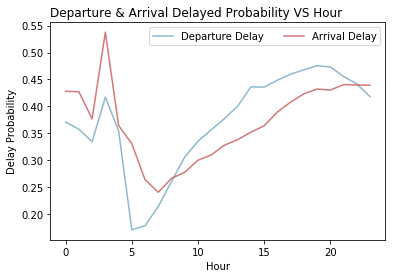

In [16]:
figure, axes = plt.subplots()
axes.plot(q1_departure_delay['HOUR'], q1_departure_delay['DEPARTURE_DELAY_BOOL'], label='Departure Delay',color='#6EA8BF',alpha=0.8)
axes.plot(q1_departure_delay['HOUR'], q1_arrival_delay['ARRIVAL_DELAY_BOOL'], label='Arrival Delay',color='#CA5555',alpha=0.8)

axes.set_title(label='Departure & Arrival Delayed Probability VS Hour', loc='left')

axes.set_ylabel('Delay Probability')
axes.set_xlabel('Hour')

# Use `fontsize` to adjust the legend font size.
axes.legend(ncol=2, loc='upper right', fontsize=10)

> **Conclusion for Question1:**
1. Whether for the departure or arrival delay, when look at the time period between 7:00 - 20:00, flight delays are more likely (probability)to happen in the later time of this time period than in the early time of this time period.
2. However, during the time period between 0:00-7:00, the delayed patters are irregular. At the early morning 4:00, both departure and arrival delay reach the highest peak in a day.
3. Another interesting pattern is before 7:00 arrival delay is more likely to happen; after 7:00 departure delay is more likely to happen.

### ● Question2 : Does the response to Claim 1 depend on the month of the year? <br>
To break down by month, I think the current time analysis by hour would be a little bit hard to be interpret if we just combine hour X month together because there will be too many variable. Therefore, I separate the time analysis into only two sections - early(00:00-11:59) and late(12:00-23:59) in a day. <br><br>
Also, I paired 'SCHEDULED_DEPARTURE_HOUR'+ 'DEPARTURE_DELAY_BOOL' and paired 'SCHEDULED_ARRIVAL_HOUR'+'ARRIVAL_DELAY_BOOL' first. Then merge them together. Intergrate them as just 'SCHEDULED HOUR' and 'DELAY BOOL' to help analyze and interpret.

In [17]:
q2_d = q1_delay_dfset[['MONTH','AIRLINE','SCHEDULED_DEPARTURE_HOUR','DEPARTURE_DELAY_BOOL']].rename(columns={'SCHEDULED_DEPARTURE_HOUR':'HOUR','DEPARTURE_DELAY_BOOL':'DELAY_BOOL'})
q2_a = q1_delay_dfset[['MONTH','AIRLINE','SCHEDULED_ARRIVAL_HOUR','ARRIVAL_DELAY_BOOL']].rename(columns={'SCHEDULED_ARRIVAL_HOUR':'HOUR','ARRIVAL_DELAY_BOOL':'DELAY_BOOL'})
q2 = pd.concat([q2_d,q2_a])
q2


,MONTH,AIRLINE,HOUR,DELAY_BOOL
0,10,UA,19,1
1,1,MQ,8,1
2,7,B6,15,1
3,6,DL,22,0
4,6,WN,13,1
5,3,WN,19,1
6,7,WN,11,1
7,4,NK,14,0
8,9,AS,9,0
9,11,EV,9,0


In [18]:
q2['EARLY_LATE'] = np.where((q2['HOUR']<=11) & (q2['HOUR']>=0), 'early', 'late')
q2

,MONTH,AIRLINE,HOUR,DELAY_BOOL,EARLY_LATE
0,10,UA,19,1,late
1,1,MQ,8,1,early
2,7,B6,15,1,late
3,6,DL,22,0,late
4,6,WN,13,1,late
5,3,WN,19,1,late
6,7,WN,11,1,early
7,4,NK,14,0,late
8,9,AS,9,0,early
9,11,EV,9,0,early


#### 1. Result

1-1. Delay probability for months (DF)

In [19]:
q2_month_delay = q2[['MONTH','DELAY_BOOL','EARLY_LATE']].groupby(['MONTH','EARLY_LATE']).aggregate('mean').rename(columns={'DELAY_BOOL':'delay_probability'}).unstack()
q2_month_delay

delay_probability          
EARLY_LATE             early      late
MONTH                                 
1                   0.306482  0.439579
2                   0.331224  0.474247
3                   0.297489  0.438577
4                   0.268138  0.396816
5                   0.259848  0.415010
6                   0.313629  0.493004
7                   0.287041  0.459542
8                   0.267871  0.423662
9                   0.210817  0.329123
10                  0.228526  0.333355
11                  0.252738  0.369673
12                  0.318062  0.431150

1-2. Graph

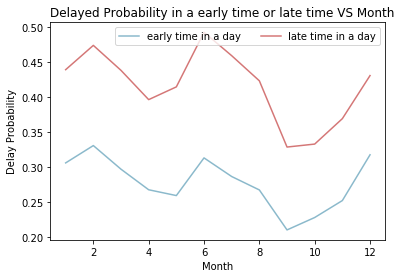

In [20]:
figure, axes = plt.subplots()
axes.plot(q2_month_delay.index, q2_month_delay ['delay_probability']['early'], label='early time in a day',color='#6EA8BF',alpha=0.8)
axes.plot(q2_month_delay.index, q2_month_delay ['delay_probability']['late'], label='late time in a day',color='#CA5555',alpha=0.8)

axes.set_title(label='Delayed Probability in a early time or late time VS Month', loc='left')

axes.set_ylabel('Delay Probability')
axes.set_xlabel('Month')

# Use `fontsize` to adjust the legend font size.
axes.legend(ncol=2, loc='upper right', fontsize=10)

> **Conclusion for Question2:**
1. Yes, delay do depends on month. During December-March(Winter to Early Spring) and June-July, the dalay is more likely to happen(also probability). 
2. However, the relationship between the delay in a early time and the delay in a late time doesn't change too much. Overall, the delay in a early time is still less likely to happen than the delay in a late time in every month. 

### ● Question3 : Does the response to Claim 1 depend on the airline? Which airlines have this phenomenon more pronounced and less pronounced?

#### 1. Result
1-1. Delay probability for airlines

In [21]:
q3 = q2[['AIRLINE','DELAY_BOOL','EARLY_LATE']].groupby(['AIRLINE','EARLY_LATE']).aggregate('mean').rename(columns={'DELAY_BOOL':'delay_probability'}).unstack()
q3.columns = ['early','late']
q3 = q3.sort_values(by=['early'])
q3

,early,late
AIRLINE,,
HA,0.216493,0.390593
DL,0.239312,0.341955
AS,0.239778,0.325668
WN,0.268051,0.498536
AA,0.268251,0.393906
EV,0.269883,0.381809
B6,0.275156,0.457475
OO,0.276797,0.372013
US,0.279180,0.407147


1-2. Graph

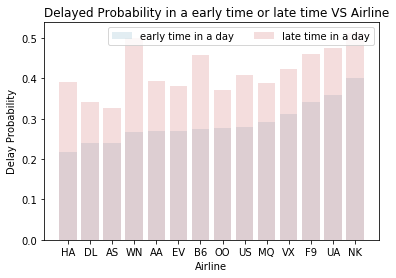

In [22]:

figure, axes = plt.subplots()

axes.bar(q3.index,q3['early'], label='early time in a day',color='#6EA8BF',alpha=0.2)
axes.bar(q3.index,q3['late'], label='late time in a day',color='#CA5555',alpha=0.2)

axes.set_title(label='Delayed Probability in a early time or late time VS Airline', loc='left')

axes.set_ylabel('Delay Probability')
axes.set_xlabel('Airline')

# Use `fontsize` to adjust the legend font size.
axes.legend(ncol=2, loc='upper right', fontsize=10)

> **Conclusion for Question3:** <br>
1. Yes, the delayed probability do depend on the airline. We can see, for the NK and UA airline, the dalayed probability both in a early time or late time are high. Airline like DL and AS have low dalayed probability both in a early time or late time.
2. The relationship between the delay in a early time and the delay in a late time doesn't change too much. Overall, the delay in a early time is still less likely to happen than the delay in a late time in every month. 
3. However, we can see there are still some Airlines have pronounced difference of delay probability in early time and late time. For example: Airline WN, B6, and HA. Compare to other Airlines, their delay is way more likely to happen lately in a day than early in a day.

### ● Question4 : Do flight cancellation happen more often later in the day than earlier in the day?

#### 1. Extract columns related to cancellation
For analysis the cancellation time (hour), I think extracting scheduled departure hour is already enough because if the flight was canceled, it is not necessary to see scheduled arrival hour anymore.

In [23]:
q4_cancel_df = flights[['YEAR','MONTH','AIRLINE','CANCELLED','SCHEDULED_DEPARTURE_HOUR']]
q4_cancel_df

,YEAR,MONTH,AIRLINE,CANCELLED,SCHEDULED_DEPARTURE_HOUR
0,2015,10,UA,0,19
1,2015,1,MQ,0,8
2,2015,7,B6,0,15
3,2015,6,DL,0,22
4,2015,6,WN,0,13
5,2015,3,WN,0,19
6,2015,7,WN,0,11
7,2015,4,NK,0,14
8,2015,9,AS,0,9
9,2015,11,EV,0,9


#### 2. Result


2-1. canceled probabiliry for hour

In [24]:
q4 = q4_cancel_df[['SCHEDULED_DEPARTURE_HOUR','CANCELLED']].groupby(['SCHEDULED_DEPARTURE_HOUR']).aggregate('mean')
q4

,CANCELLED
SCHEDULED_DEPARTURE_HOUR,
0,0.009938
1,0.005946
2,0.016556
3,0.015504
4,0.008850
5,0.018891
6,0.018200
7,0.013966
8,0.014606


2-2. Graph

Text(0.5,0,'HOUR')

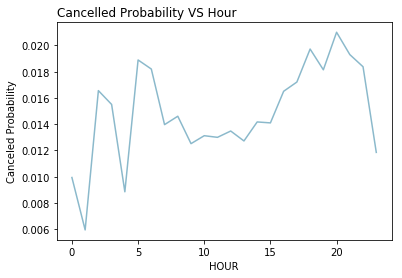

In [25]:
figure, axes = plt.subplots()
axes.plot(q4.index, q4['CANCELLED'], color='#6EA8BF',alpha=0.8)

axes.set_title(label='Cancelled Probability VS Hour', loc='left')

axes.set_ylabel('Canceled Probability')
axes.set_xlabel('HOUR')

> **Conclusion for Question4:** Though the cancelled probability do have something to do with the Hour in one day, since the pattern is pretty irregular, we can't say flight cancellation happen more often later in the day than earlier in the day. The cancel probability reaches its peak at 2:00-3:00,5:00-6:00, and 16:00-22:00. However, we need to find some other outsource, industry knowledge, or benchmark to confirm whether a 0.020 and a 0.006 cancellation rates are huge different because they probability all stands for 'low' cancellation rates.

### ● Question5 : Does the response to Claim 4 depend on the month of the year and on the airline? <br>
To break down by month and airline, I think the current time analysis by hour would be a little bit hard to be interpret if we just combine hour X month together because there will be too many variable. Therefore, I separate the time analysis into only two sections - early(00:00-11:59) and late(12:00-23:59) in a day. <br><br>

#### 1. Result

1-1. canceled probability for month

In [26]:
q4_cancel_df['EARLY_LATE'] = np.where((q4_cancel_df['SCHEDULED_DEPARTURE_HOUR']<=11) & (q4_cancel_df['SCHEDULED_DEPARTURE_HOUR']>=0), 'early', 'late')
q4_cancel_df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YEAR,MONTH,AIRLINE,CANCELLED,SCHEDULED_DEPARTURE_HOUR,EARLY_LATE
0,2015,10,UA,0,19,late
1,2015,1,MQ,0,8,early
2,2015,7,B6,0,15,late
3,2015,6,DL,0,22,late
4,2015,6,WN,0,13,late
5,2015,3,WN,0,19,late
6,2015,7,WN,0,11,early
7,2015,4,NK,0,14,late
8,2015,9,AS,0,9,early
9,2015,11,EV,0,9,early


In [27]:
q4_month = q4_cancel_df[['MONTH','EARLY_LATE','CANCELLED']].groupby(['MONTH','EARLY_LATE']).aggregate('mean').unstack()
q4_month.columns = ['early','late']
q4_month

,early,late
MONTH,,
1,0.026571,0.025158
2,0.048763,0.048087
3,0.021697,0.021256
4,0.008373,0.009156
5,0.009565,0.012461
6,0.014163,0.021619
7,0.008068,0.010824
8,0.008062,0.011141
9,0.003664,0.005045


1-2. canceled probability for airline

In [28]:
q4_air = q4_cancel_df[['AIRLINE','EARLY_LATE','CANCELLED']].groupby(['AIRLINE','EARLY_LATE']).aggregate('mean').unstack()
q4_air.columns = ['early','late']
q4_air

,early,late
AIRLINE,,
AA,0.014623,0.015143
AS,0.004722,0.004322
B6,0.016092,0.016832
DL,0.003986,0.004482
EV,0.022049,0.030101
F9,0.006086,0.007210
HA,0.001520,0.002976
MQ,0.044861,0.056189
NK,0.014770,0.018798


1-2. Graph

In [29]:
q4_month = q4_month.reset_index().sort_values(by=['early'])
q4_month['MONTH'] = q4_month['MONTH'].astype(str)

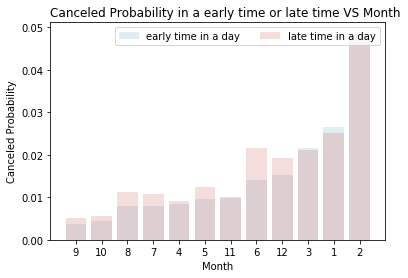

In [30]:
figure, axes = plt.subplots()

axes.bar(q4_month['MONTH'],q4_month['early'], label='early time in a day',color='#6EA8BF',alpha=0.2)
axes.bar(q4_month['MONTH'],q4_month['late'], label='late time in a day',color='#CA5555',alpha=0.2)

axes.set_title(label='Canceled Probability in a early time or late time VS Month', loc='left')

axes.set_ylabel('Canceled Probability')
axes.set_xlabel('Month')

# Use `fontsize` to adjust the legend font size.
axes.legend(ncol=2, loc='upper right', fontsize=10)

> **Conclusion for Question5-1:**
1. Yes, cancellation do depends on month. During December-March(Winter to Early Spring) and June, cancellation is more likely to happen. During September - October,  cancellation is less likely to happen
2. Overall, the cancellation in a early time and  the cancellation in a late time are still not significantly different from each other. On average, cancellation in a early time is less likely to happen than cancellation in a late time in every month (though there are a few months have a higher cancellation probability in a early time in a day). 
3. However, we can see in June, concellation probability is apparently higher in the late time than in the early time.

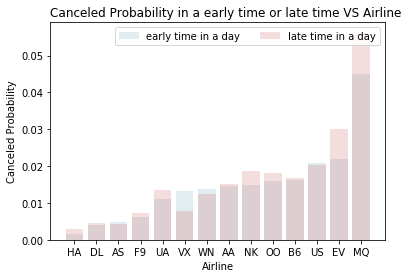

In [31]:
q4_air = q4_air.sort_values(by=['early'])
figure, axes = plt.subplots()

axes.bar(q4_air.index,q4_air['early'], label='early time in a day',color='#6EA8BF',alpha=0.2)
axes.bar(q4_air.index,q4_air['late'], label='late time in a day',color='#CA5555',alpha=0.2)

axes.set_title(label='Canceled Probability in a early time or late time VS Airline', loc='left')

axes.set_ylabel('Canceled Probability')
axes.set_xlabel('Airline')

# Use `fontsize` to adjust the legend font size.
axes.legend(ncol=2, loc='upper right', fontsize=10)

> **Conclusion for Question5-2:**
1. Cancellation do depends on month. MQ and EV Airline have highest cancellation probability.  HA, DL, and AS Airline have lowest cancellation probability.
2. Overall, the cancellation in a early time and  the cancellation in a late time not significantly different from each other. However, we can see for Airline MQ and EV, concellation probability is apparently higher in the late time than in the early time.

### ● Question6 : State based analysis: What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? Come up with qualitative (and/or quantitative) reason for why you think these states are lowest and highest flight delays.

**1. Extract columns we need**

In [32]:
q6_delay_state = q1_delay_dfset[['YEAR', 'MONTH', 'ORIGIN_AIRPORT', 'SCHEDULED_DEPARTURE_HOUR','DESTINATION_AIRPORT','SCHEDULED_ARRIVAL_HOUR','AIRLINE', 'DEPARTURE_DELAY_BOOL', 'ARRIVAL_DELAY_BOOL']]
q6_delay_state

,YEAR,MONTH,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE_HOUR,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL_HOUR,AIRLINE,DEPARTURE_DELAY_BOOL,ARRIVAL_DELAY_BOOL
0,2015,10,11618,19,13930,21,UA,1,0
1,2015,1,ORD,8,MLI,9,MQ,1,1
2,2015,7,FLL,15,JFK,18,B6,1,0
3,2015,6,ATL,22,CLE,23,DL,0,0
4,2015,6,CLT,13,BWI,15,WN,1,0
5,2015,3,MDW,19,BOS,23,WN,1,1
6,2015,7,DEN,11,FLL,17,WN,1,1
7,2015,4,MYR,14,LGA,15,NK,0,1
8,2015,9,SJC,9,HNL,11,AS,0,1
9,2015,11,ORD,9,PIA,10,EV,0,0


In [33]:
airports_set = airports[['IATA_CODE','STATE']]
airports_set.head()

,IATA_CODE,STATE
0,ABE,PA
1,ABI,TX
2,ABQ,NM
3,ABR,SD
4,ABY,GA


**2. Clean and Merge Data**

2-1. Deal with the 'digits' airport code in October 

In [34]:
q6_delay_state.sort_values(by=['MONTH'])[q6_delay_state['MONTH']==10]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,YEAR,MONTH,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE_HOUR,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL_HOUR,AIRLINE,DEPARTURE_DELAY_BOOL,ARRIVAL_DELAY_BOOL
1000736,2015,10,11433,16,13198,17,NK,0,0
404130,2015,10,15624,5,10397,7,DL,0,0
73182,2015,10,12892,16,14771,17,VX,0,1
373701,2015,10,10397,11,14027,13,DL,0,0
987657,2015,10,12266,16,13871,18,EV,1,0
1000747,2015,10,10397,16,13930,17,DL,0,0
939361,2015,10,12266,16,13871,18,EV,0,0
405001,2015,10,11298,9,14107,9,AA,0,0
373740,2015,10,10685,16,10397,19,EV,0,1
57115,2015,10,14893,7,13891,8,WN,0,0


To locate these airports with digits code to a State, I find the outsoucing data set as a library.

In [35]:
fivedigit_code = pd.read_csv("L_AIRPORT_ID.csv")
fivedigit_code.head()

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


In [36]:
#clean up the df
fivedigit_code['Description'] = pd.DataFrame(fivedigit_code.Description.str.split(',|:',).tolist())[1]

fivedigit_code.rename(columns={'Code':'IATA_CODE','Description':'STATE'},inplace=True)
fivedigit_code

,IATA_CODE,STATE
0,10001,AK
1,10003,AK
2,10004,AK
3,10005,AK
4,10006,AK
5,10007,AK
6,10008,AK
7,10009,AK
8,10010,NY
9,10011,AZ


2-2. Merge the dataframe

In [37]:
#to make a full dictionary with both 3 character IATA_code and 5 digits airport code to check their corresponding state
airports_set_c = pd.concat([airports_set,fivedigit_code])

#and remove spaces in string
airports_set_c["STATE"] = airports_set_c["STATE"].str.replace(' ', '')
airports_set_c = airports_set_c.drop_duplicates()
airports_set_c.head()

,IATA_CODE,STATE
0,ABE,PA
1,ABI,TX
2,ABQ,NM
3,ABR,SD
4,ABY,GA


In [38]:
# align datatype to string for merging
airports_set_c['IATA_CODE']=airports_set_c['IATA_CODE'].astype(str)

In [39]:
#MERGE the flight df with the state information by origin airport or destination airport
q6 = pd.merge(q6_delay_state,airports_set_c,how='left',left_on='ORIGIN_AIRPORT',right_on='IATA_CODE')
q6.rename(columns={'STATE':'ORIGIN_STATE'},inplace=True)
q6.drop(['IATA_CODE'],axis=1,inplace=True)
q6 = pd.merge(q6,airports_set_c,how='left',left_on='DESTINATION_AIRPORT',right_on='IATA_CODE')
q6.rename(columns={'STATE':'DESTINATION_STATE'},inplace=True)
q6.drop(['IATA_CODE'],axis=1,inplace=True)
q6

,YEAR,MONTH,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE_HOUR,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL_HOUR,AIRLINE,DEPARTURE_DELAY_BOOL,ARRIVAL_DELAY_BOOL,ORIGIN_STATE,DESTINATION_STATE
0,2015,10,11618,19,13930,21,UA,1,0,NJ,IL
1,2015,1,ORD,8,MLI,9,MQ,1,1,IL,IL
2,2015,7,FLL,15,JFK,18,B6,1,0,FL,NY
3,2015,6,ATL,22,CLE,23,DL,0,0,GA,OH
4,2015,6,CLT,13,BWI,15,WN,1,0,NC,MD
5,2015,3,MDW,19,BOS,23,WN,1,1,IL,MA
6,2015,7,DEN,11,FLL,17,WN,1,1,CO,FL
7,2015,4,MYR,14,LGA,15,NK,0,1,SC,NY
8,2015,9,SJC,9,HNL,11,AS,0,1,CA,HI
9,2015,11,ORD,9,PIA,10,EV,0,0,IL,IL


In [40]:
depature_delay_state = q6[['DEPARTURE_DELAY_BOOL','ORIGIN_STATE']].groupby(['ORIGIN_STATE']).aggregate('mean').sort_values(by=['DEPARTURE_DELAY_BOOL'])
arrival_delay_state = q6[['ARRIVAL_DELAY_BOOL','DESTINATION_STATE']].groupby(['DESTINATION_STATE']).aggregate('mean').sort_values(by=['ARRIVAL_DELAY_BOOL'])
delay_state = pd.merge(depature_delay_state,arrival_delay_state,how='outer',left_index=True, right_index=True)
delay_state['DELAY_PROBABILITY_MEAN']= (delay_state['DEPARTURE_DELAY_BOOL'] + delay_state['ARRIVAL_DELAY_BOOL'])/2
delay_state.sort_values(by=['DELAY_PROBABILITY_MEAN'],inplace=True)
delay_state

,DEPARTURE_DELAY_BOOL,ARRIVAL_DELAY_BOOL,DELAY_PROBABILITY_MEAN
MT,0.178912,0.321944,0.250428
WY,0.213144,0.316043,0.264594
UT,0.273685,0.298274,0.285980
ND,0.226133,0.367148,0.296641
ID,0.241150,0.360410,0.300780
DC,0.307575,0.297756,0.302665
WI,0.268692,0.338295,0.303494
MS,0.247323,0.366030,0.306676
OR,0.287262,0.330915,0.309088
MN,0.301379,0.349285,0.325332


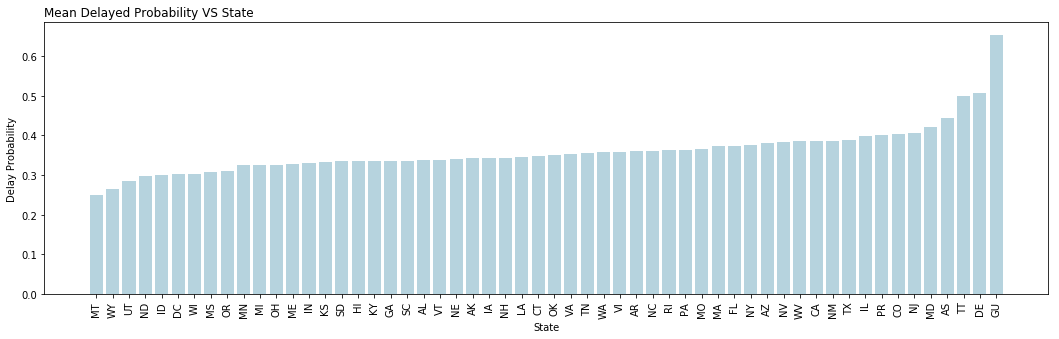

In [41]:
figure, axes = plt.subplots(figsize=(18,5))
chart = axes.bar(delay_state.index,delay_state['DELAY_PROBABILITY_MEAN'], color='#6EA8BF',alpha=0.5)

axes.set_title(label='Mean Delayed Probability VS State', loc='left')

axes.set_ylabel('Delay Probability')
axes.set_xlabel('State')
axes.tick_params(axis ='x', rotation = 90) 

In [42]:
pd.concat([delay_state['DELAY_PROBABILITY_MEAN'].iloc[0:3],delay_state['DELAY_PROBABILITY_MEAN'].iloc[-3:]])

MT    0.250428
WY    0.264594
UT    0.285980
TT    0.500000
DE    0.505853
GU    0.652679
Name: DELAY_PROBABILITY_MEAN, dtype: float64

> **Conclusion for Question6:** the top three states with lowest average flight delay: MT, WY, UT/ the top three states with highest average flight delay: GU, DE, TT

**3. Analyze the Reason**: Extract columns that are potential to analyze the reason. Here, I make my first assumption that the delay in state have something to do with the airline in the states.

In [43]:
#Extract the columns I need
#use mask to extract only the top3 states with the lowest delay and the top3 states with the highest delay
mask_o = (q6['ORIGIN_STATE']=='MT') | (q6['ORIGIN_STATE']=='WY') | (q6['ORIGIN_STATE']=='UT') | (q6['ORIGIN_STATE']=='TT') | (q6['ORIGIN_STATE']=='DE') | (q6['ORIGIN_STATE']=='GU')  
mask_d = (q6['DESTINATION_STATE']=='MT') | (q6['DESTINATION_STATE']=='WY') | (q6['DESTINATION_STATE']=='UT') | (q6['DESTINATION_STATE']=='TT') | (q6['DESTINATION_STATE']=='DE') | (q6['DESTINATION_STATE']=='GU')  

q6_interpret_d = q6[['AIRLINE','ORIGIN_STATE','SCHEDULED_DEPARTURE_HOUR','DEPARTURE_DELAY_BOOL']][mask_o]
q6_interpret_a = q6[['AIRLINE','DESTINATION_STATE','SCHEDULED_ARRIVAL_HOUR','ARRIVAL_DELAY_BOOL']] [mask_d]
#for departure
q6_interpret_d.head()

,AIRLINE,ORIGIN_STATE,SCHEDULED_DEPARTURE_HOUR,DEPARTURE_DELAY_BOOL
19,OO,UT,9,0
38,OO,UT,11,0
58,OO,UT,9,0
73,DL,UT,15,1
126,DL,UT,21,1


In [44]:
#for arrival
q6_interpret_a.head()

,AIRLINE,DESTINATION_STATE,SCHEDULED_ARRIVAL_HOUR,ARRIVAL_DELAY_BOOL
50,OO,UT,17,0
51,UA,WY,20,1
56,DL,UT,8,0
168,DL,MT,0,0
420,OO,MT,12,1


3-1. Analyze the departure X delay X State X Airline

In [45]:
q6_interpret_d_airline = q6_interpret_d[['AIRLINE','ORIGIN_STATE','DEPARTURE_DELAY_BOOL']].groupby(['ORIGIN_STATE','AIRLINE']).agg(['count', 'sum']).rename(columns={'count':'flight_count','sum':'delay_count'})
q6_interpret_d_airline.reset_index(inplace=True)
q6_interpret_d_airline.rename(columns={'ORIGIN_STATE':'STATE'},inplace=True)
q6_interpret_d_airline

STATE AIRLINE DEPARTURE_DELAY_BOOL            
                         flight_count delay_count
0     DE      F9                   23          10
1     GU      UA                   62          41
2     MT      DL                  617          95
3     MT      EV                   16           0
4     MT      F9                   74          15
5     MT      OO                 2239         378
6     MT      UA                  307          94
7     TT      HA                    1           1
8     TT      UA                    4           2
9     UT      AA                  666         210
10    UT      AS                  459          82
11    UT      B6                  302         169
12    UT      DL                 7229        2198
13    UT      EV                   13           4
14    UT      F9                  282          97
15    UT      MQ                    9           5
16    UT      OO                10326        2164
17    UT      UA                  301         126
18    UT      US                  272          81
19    UT      WN                 1874         812
20    WY      AA                   80          17
21    WY      DL                  147          22
22    WY      OO                 1264         241
23    WY      UA                  198          80

3-2. Then analyze the arrival delay X State X Airline

In [46]:
q6_interpret_a_airline = q6_interpret_a[['AIRLINE','DESTINATION_STATE','ARRIVAL_DELAY_BOOL']].groupby(['DESTINATION_STATE','AIRLINE']).agg(['count', 'sum']).rename(columns={"count":"flight_count","sum":"delay_count"})
q6_interpret_a_airline.reset_index(inplace=True)
q6_interpret_a_airline.rename(columns={'DESTINATION_STATE':'STATE'},inplace=True)
q6_interpret_a_airline

STATE AIRLINE ARRIVAL_DELAY_BOOL            
                       flight_count delay_count
0     DE      F9                 26          15
1     GU      UA                 59          38
2     MT      DL                610         161
3     MT      EV                 16           9
4     MT      F9                 60          24
5     MT      OO               2237         740
6     MT      UA                267          93
7     TT      HA                  3           2
8     TT      UA                  2           0
9     UT      AA                676         252
10    UT      AS                432         118
11    UT      B6                304         150
12    UT      DL               7168        1928
13    UT      EV                 10           4
14    UT      F9                294         131
15    UT      MQ                 13           4
16    UT      OO              10182        2816
17    UT      UA                304         103
18    UT      US                253          94
19    UT      WN               1918         829
20    WY      AA                 87          32
21    WY      DL                147          34
22    WY      OO               1212         354
23    WY      UA                212         104

In [47]:
q6_interpret_c = pd.merge(q6_interpret_d_airline,q6_interpret_a_airline,how='outer',on=['STATE','AIRLINE'])
q6_interpret_c['Count'] = q6_interpret_c['DEPARTURE_DELAY_BOOL']['flight_count'] +  q6_interpret_c['ARRIVAL_DELAY_BOOL']['flight_count']
q6_interpret_c['Delay count'] = q6_interpret_c['DEPARTURE_DELAY_BOOL']['delay_count'] +  q6_interpret_c['ARRIVAL_DELAY_BOOL']['delay_count']
q6_interpret_c['Probability'] = q6_interpret_c['Delay count'] / q6_interpret_c['Count'] 
q6_interpret_c = q6_interpret_c [['STATE','AIRLINE','Count','Delay count','Probability']]
q6_interpret_c

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,STATE,AIRLINE,Count,Delay count,Probability
,,,,,
0,DE,F9,49,25,0.510204
1,GU,UA,121,79,0.652893
2,MT,DL,1227,256,0.208639
3,MT,EV,32,9,0.281250
4,MT,F9,134,39,0.291045
5,MT,OO,4476,1118,0.249777
6,MT,UA,574,187,0.325784
7,TT,HA,4,3,0.750000
8,TT,UA,6,2,0.333333


In [48]:
#'MT', 'WY','KS' ,' TT' ,'DE','GU']
MT = q6_interpret_c[q6_interpret_c['STATE']=='MT']

WY = q6_interpret_c[q6_interpret_c['STATE']=='WY']

UT = q6_interpret_c[q6_interpret_c['STATE']=='UT']

TT = q6_interpret_c[q6_interpret_c['STATE']=='TT']

DE = q6_interpret_c[q6_interpret_c['STATE']=='DE']

GU = q6_interpret_c[q6_interpret_c['STATE']=='GU']

The first row lists states with the lowest delayed probability.The second row lists states with the highest delayed probability.
Blue bar represents flight counts. Red line represents delayed probability.


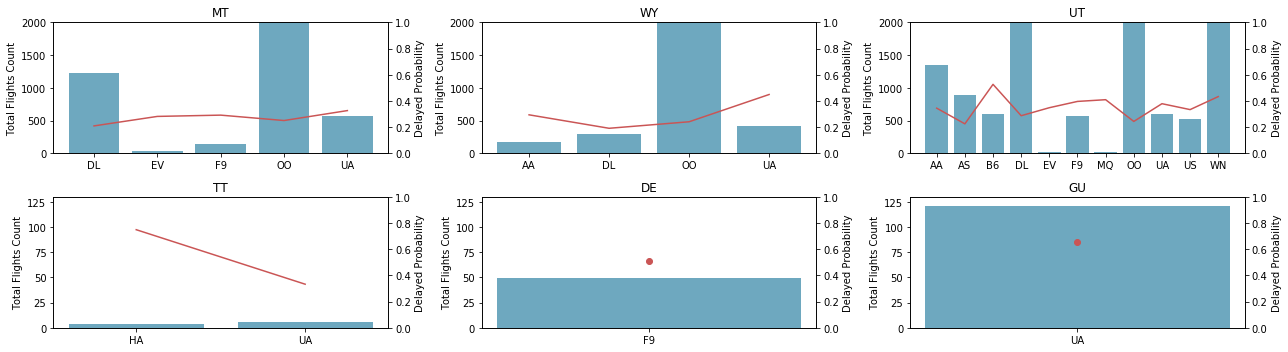

In [49]:
figure, axes = plt.subplots(2,3,figsize=(18,5))


axes[0,0].bar(MT['AIRLINE'], MT['Count'],color='#6EA8BF')
ax2=axes[0,0].twinx()
ax2.plot(MT['AIRLINE'],MT['Probability'],color='#CA5555')
axes[0,0].set_title('MT')
axes[0,0].set_ylim([0, 2000])
axes[0,0].set_ylabel('Total Flights Count')
ax2.set_ylim([0, 1])
ax2.set_ylabel('Delayed Probability')

axes[0,1].bar(WY['AIRLINE'], WY['Count'],color='#6EA8BF')
ax2=axes[0,1].twinx()
ax2.plot(WY['AIRLINE'],WY['Probability'],color='#CA5555')
axes[0,1].set_title('WY')
axes[0,1].set_ylim([0, 2000])
axes[0,1].set_ylabel('Total Flights Count')
ax2.set_ylim([0, 1])
ax2.set_ylabel('Delayed Probability')

axes[0,2].bar(UT['AIRLINE'], UT['Count'],color='#6EA8BF')
ax2=axes[0,2].twinx()
ax2.plot(UT['AIRLINE'],UT['Probability'],color='#CA5555')
axes[0,2].set_title('UT')
axes[0,2].set_ylim([0, 2000])
axes[0,2].set_ylabel('Total Flights Count')
ax2.set_ylim([0, 1])
ax2.set_ylabel('Delayed Probability')

axes[1,0].bar(TT['AIRLINE'], TT['Count'],color='#6EA8BF')
ax2=axes[1,0].twinx()
ax2.plot(TT['AIRLINE'],TT['Probability'],color='#CA5555')
axes[1,0].set_title('TT')
axes[1,0].set_ylim([0, 130])
axes[1,0].set_ylabel('Total Flights Count')
ax2.set_ylim([0, 1])
ax2.set_ylabel('Delayed Probability')

axes[1,1].bar(DE['AIRLINE'], DE['Count'],color='#6EA8BF')
ax2=axes[1,1].twinx()
ax2.plot(DE['AIRLINE'],DE['Probability'],color='#CA5555',marker='o')
axes[1,1].set_title('DE')
axes[1,1].set_ylim([0, 130])
axes[1,1].set_ylabel('Total Flights Count')
ax2.set_ylim([0, 1])
ax2.set_ylabel('Delayed Probability')

axes[1,2].bar(GU['AIRLINE'], GU['Count'],color='#6EA8BF')
ax2=axes[1,2].twinx()
ax2.plot(GU['AIRLINE'],GU['Probability'],color='#CA5555',marker='o')
axes[1,2].set_title('GU')
axes[1,2].set_ylim([0, 130])
axes[1,2].set_ylabel('Total Flights Count')
ax2.set_ylim([0, 1])
ax2.set_ylabel('Delayed Probability')


plt.tight_layout() 
print("The first row lists states with the lowest delayed probability.The second row lists states with the highest delayed probability.")
print("Blue bar represents flight counts. Red line represents delayed probability.")

> **Reasons: Conclusion for Question6:** <br>
**Reason1**: states that have less number of flights and dominated by only 1-2 airlines are prone to be affected by an Airline's high delayed probability. However, for states with more flights and airlines, even if one of the airline has a high delayed probability, the whole state's delay probability won't be affected by the extreme value that much. <br><br>
**Reason2**: Some Airlines like DL or OO are more likely to be on time (low delayed probability). If one states have more flights like DL and OO, the overall dalyed probability will go down. On the contrary, for airlines like UA, it usually has a higher delayed probability. If a States has a lot flights from UA, its overall dalyed probability will increase. (This somehow aligned with the result of Question3)

### ● Question7 :Taxi time in the flight is most frustrating experience to me. Can you let me know which airports I should avoid and which ones I should prefer? Answer this based on average taxi time (both taxi in and taxi out)?

In [50]:
#First, I want make sure the origin_airport is paired with Taxi_out in a row. The destination_airport is paired with Taxi_in in a row.
#Then, I can unify their column names and concat them with axis=0
q7_1 = flights[['ORIGIN_AIRPORT','TAXI_OUT']].rename(columns={'ORIGIN_AIRPORT':'AIRPORT','TAXI_OUT':'TAXI_TIME'})
q7_2 = flights[['DESTINATION_AIRPORT','TAXI_IN']].rename(columns={'DESTINATION_AIRPORT':'AIRPORT','TAXI_IN':'TAXI_TIME'})

#revise the 5 digits code

q7 = pd.concat([q7_1,q7_2]).groupby(['AIRPORT']).aggregate('mean').sort_values(by=['TAXI_TIME']).reset_index()
q7

,AIRPORT,TAXI_TIME
0,11503,4.000000
1,10666,4.000000
2,CNY,4.657534
3,13970,4.750000
4,15841,4.769231
5,ADQ,4.814208
6,VEL,5.061728
7,10926,5.150000
8,15991,5.307692
9,OME,5.333333


In [51]:
q7 = q7[~q7.AIRPORT.str.contains(r'[0-9]')].reset_index(drop=True)
q7

,AIRPORT,TAXI_TIME
0,CNY,4.657534
1,ADQ,4.814208
2,VEL,5.061728
3,OME,5.333333
4,BET,5.455587
5,SCC,5.606918
6,WRG,5.624521
7,DLG,5.864865
8,BRW,5.889937
9,YAK,5.944444


> **Conclusion for Question7:** <br>
The most preferred Airport: CNY with the average taxi_time: 4.657534246575342<br>
Airport should be avoided: JFK with the average taxi_time: 17.892924284118465